# Customer Segment Prediction 

Here, we will analyze a dataset containing data on various customer's annual spending amounts of diverse product categories . Our main aim is to describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

Below are the data attributes on the dataset provided [Wholesale Customers data.csv](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). These values will help us in understanding the data we are dealing with.
### Attribute Information:
1) FRESH: annual spending (m.u.) on fresh products (Continuous);

2) MILK: annual spending (m.u.) on milk products (Continuous);

3) GROCERY: annual spending (m.u.)on grocery products (Continuous);

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)

8) REGION: customers Region  Lisnon, Oporto or Other (Nominal)

### Descriptive Statistics:

#### (Minimum, Maximum, Mean, Std. Deviation)
- FRESH ( 3, 112151, 12000.30, 12647.329)
- MILK (55, 73498, 5796.27, 7380.377)
- GROCERY (3, 92780, 7951.28, 9503.163)
- FROZEN (25, 60869, 3071.93, 4854.673)
- DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
- DELICATESSEN (3, 47943, 1524.87, 2820.106)

#### REGION Frequency
- Lisbon 77
- Oporto 47
- Other Region 316
- Total 440

#### CHANNEL Frequency
- Horeca 298
- Retail 142
- Total 440



In [142]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree  import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')
# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

Here we will load the data provided to us o create a data frame

In [143]:
customers = pd.read_csv('Wholesale Customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [144]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

In [145]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

As there is no missing data we will move ahead for data exploration. Also 'Channel' and 'Region' will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [146]:
customers.drop(['Channel','Region'], axis = 1, inplace = True)

In [147]:
column_list = customers.columns

In [148]:
for i in column_list:
        print ('Maximum Index for {} column is {}'.format(i, customers[i].argmax()))

Maximum Index for Fresh column is 181
Maximum Index for Milk column is 86
Maximum Index for Grocery column is 85
Maximum Index for Frozen column is 325
Maximum Index for Detergents_Paper column is 85
Maximum Index for Delicassen column is 183


In [149]:
for i in column_list:
        print ('Minimum Index for {} column is {}'.format(i, customers[i].argmin()))

Minimum Index for Fresh column is 95
Minimum Index for Milk column is 154
Minimum Index for Grocery column is 75
Minimum Index for Frozen column is 420
Minimum Index for Detergents_Paper column is 75
Minimum Index for Delicassen column is 109


From the exploration above we can see some pattern emerging:
    1. The grocery and Detergents_paper column are probably correlated
    2. Index 85 is probably a big (or biggest)  whole sealer of grocery and Detergents_paper
    3. Index 75 is probably a small retailer with least selling items grocery and Detergents_paper
    4. Consumption of Fresh products and Grocery is maximum due to high Mean value

Now let is see if there is some correlation between some columns with other columns in the dataset. Therefore we will remove 
Grocery column and try to predict it with Supervised learning

In [150]:
groceries = customers.Grocery 

In [151]:
customer_new = customers.copy()
customer_new.drop('Grocery', axis = 1, inplace =True)

In [152]:
customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


We will follow standard process for Supervised learning method

1. Split data into Test and Train
2. Fit the classifier in Training data
3. Predicting the Testing data and checking its score

In [153]:
X_train, X_test, y_train, y_test = train_test_split(customer_new,groceries, test_size=0.25)

In [154]:
clf = DecisionTreeRegressor(min_samples_split = 10 , min_samples_leaf = 6)
model = clf.fit(X_train, y_train)
prediction = model.predict(X_test)
prediction

array([  738.42857143, 18073.16666667, 29682.16666667,  8063.5       ,
        2562.85714286, 11979.375     ,  8063.5       , 22972.875     ,
        2214.66666667, 10943.8       , 16903.66666667,  2632.9       ,
        2214.66666667,  3682.9       ,  1952.        ,  2387.90909091,
        3504.45454545, 17026.83333333,  2594.16666667,  1708.85714286,
        5562.55555556,  1708.85714286, 12694.5       ,  5939.625     ,
         977.42857143,  3181.        , 10708.44444444, 29682.16666667,
        2214.66666667,  6414.5       ,  2546.5       ,  7515.66666667,
        7746.66666667,  1708.85714286,  1708.85714286,  6414.5       ,
       22972.875     ,  6414.5       , 12694.5       , 10708.44444444,
         649.85714286,  9449.33333333,  2546.5       ,  3504.45454545,
        5562.55555556, 12694.5       ,  7633.33333333, 17026.83333333,
       18068.66666667, 10943.8       ,  2632.9       ,  3504.45454545,
        2546.5       ,  2387.90909091,  7124.        ,  4917.        ,
      

In [155]:
scoring = r2_score(y_test, prediction)
scoring

0.6853338007240916

From the scoring above we can see the Decision tree regressor performed considerably well telling us that this feature alone cannot be used to extract spending habits of customers. Now let us investigate further by ploting a scatter matrix for each feature.

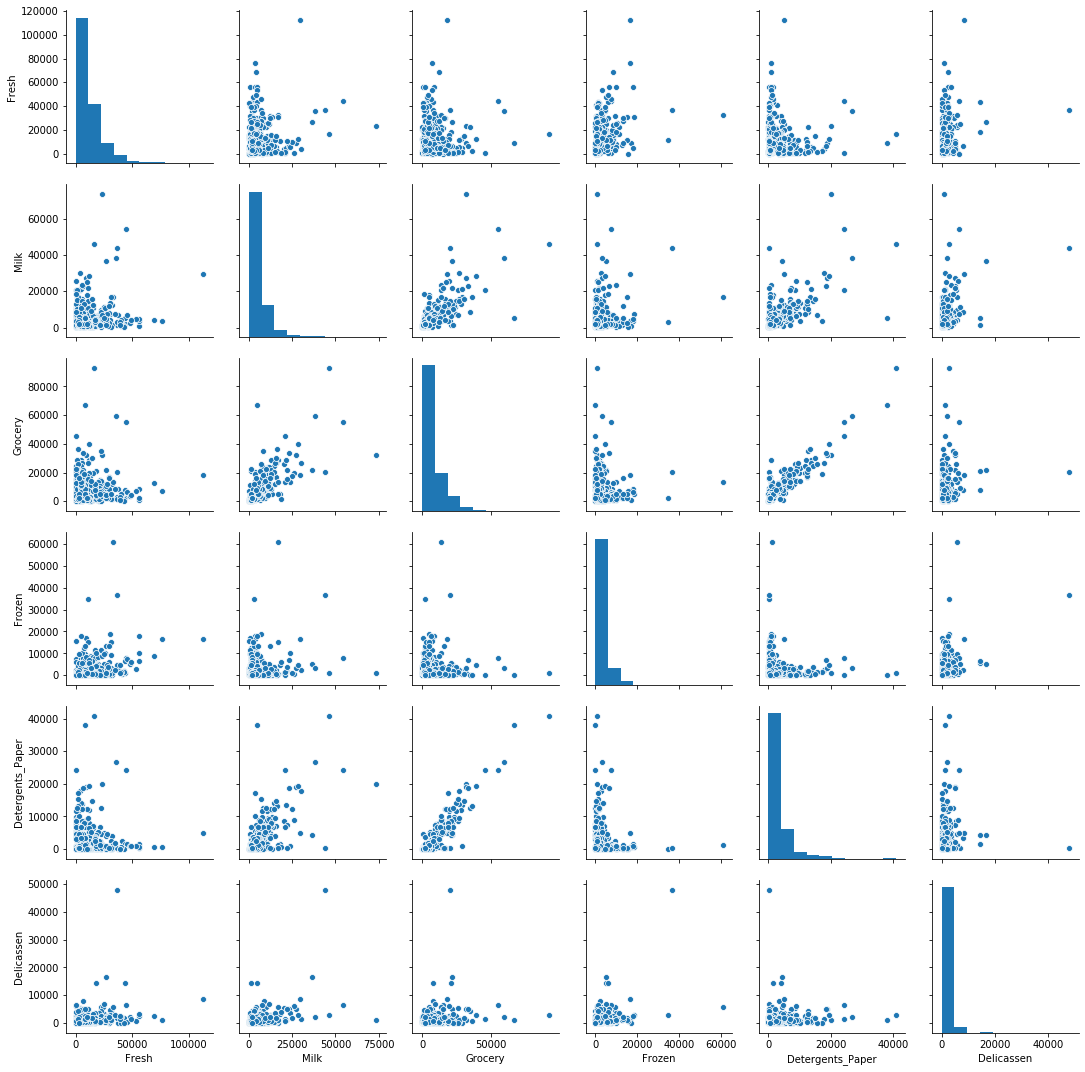

In [156]:
sns.pairplot(customers)

## 1.2 Feature Scaling

### 1.2.1 Normalizing Skewed data
From  the scatter plots above we can see that all the features have positively skewed graphs and we can identify there is a relationship grocery and detergents_paper. Also grocery and milk are showing some relationship. So to remove the skewed data from giving us the skewed output we will apply log on all the elements of the feature set. This will remove the skewed nature of the data

In [157]:
customers_transformed = pd.DataFrame(data = np.log(customers) , columns = customers.columns)

In [158]:
customers_transformed

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


Now plotting the scatter matrix will show that distribution of data is normal now

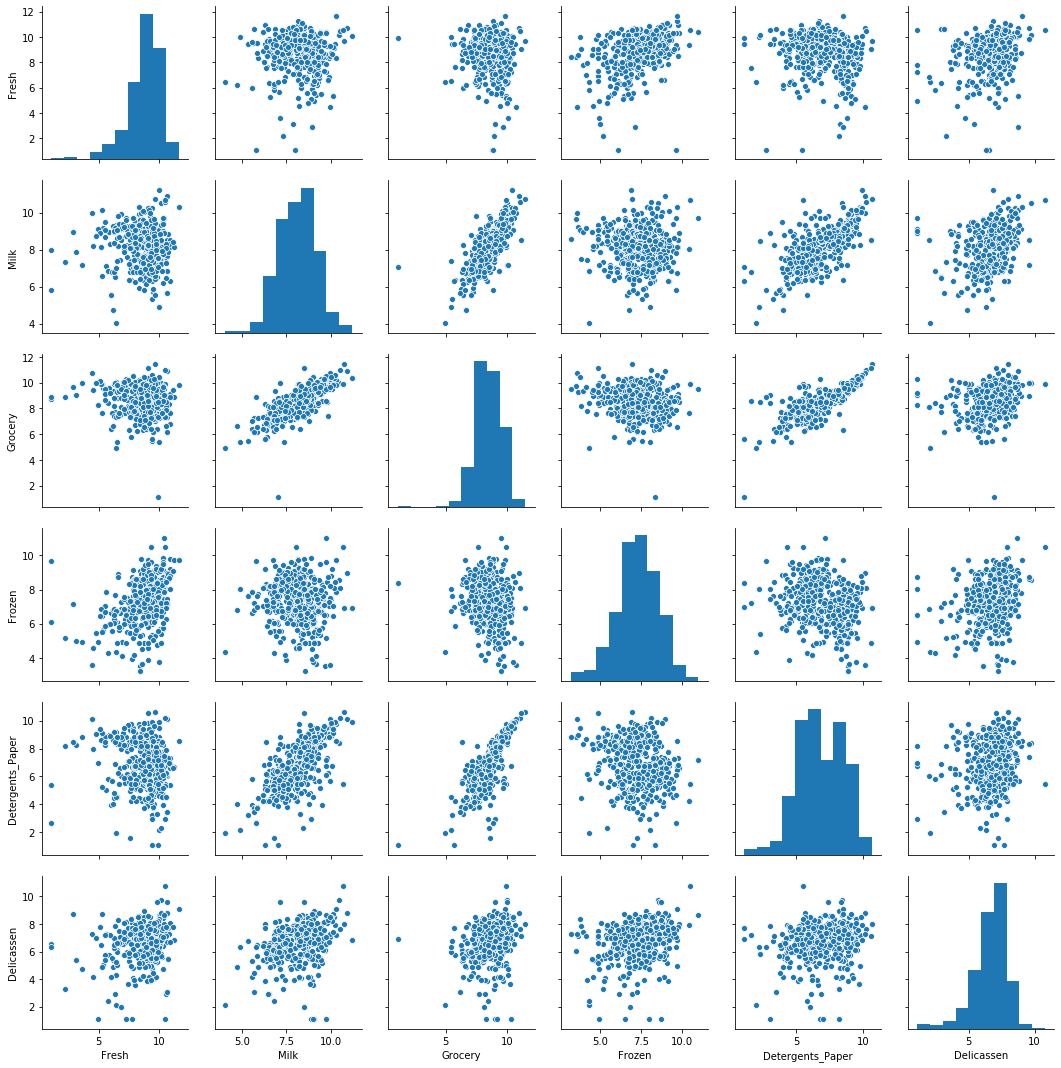

In [159]:
sns.pairplot(customers_transformed)

### 1.2.2 Removing the Outliers

To remove the outliers we will use Inter quartile range where 1.5 times the middle 50% of the distribution is selected and remaining is removed from the dataset

In [160]:
full_dict = {}
for i in customers_transformed:
    iqr = np.percentile(customers_transformed[i],75) - np.percentile(customers_transformed[i],25)
    cutoff = iqr * 1.5
    lower = np.percentile(customers_transformed[i],25) - cutoff
    upper = np.percentile(customers_transformed[i],75) + cutoff
    index_list  = []
    for j in customers_transformed[i]:
        if (j < lower or j > upper):
            index_list.append(customers_transformed[customers_transformed[i] == j].index.values[0])
    full_dict[i] = set(index_list)
print (full_dict)

{'Fresh': {96, 65, 66, 128, 193, 353, 355, 357, 171, 304, 81, 305, 218, 412, 95}, 'Milk': {98, 356, 86, 154}, 'Grocery': {154, 75}, 'Frozen': {65, 420, 325, 38, 264, 429, 175, 145, 439, 57}, 'Detergents_Paper': {75}, 'Delicassen': {289, 66, 137, 233, 203, 109, 183, 184, 154, 343}}


Here we can see which Indexes per Feature are outliers. So we will remove indexes are exist in more than one feature

In [161]:
duplicates = [ ]
dump = []
for i in full_dict:
    for j in (full_dict[i]):
        if j not in dump:
            dump.append(j)
        else:
            duplicates.append(j)
duplicates = set(duplicates)
print (list(duplicates))

[65, 154, 75, 66]


In [162]:
customers_transformed.drop(list(duplicates), axis = 0, inplace = True)

In [163]:
customers_transformed

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


### 2. Perform Dimensionality Reduction 

Now we will perform dimensionality reduction using Principle component Analysis

In [164]:
pca = PCA()
pca.fit(customers_transformed)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [165]:
pca.explained_variance_ratio_

array([0.43797072, 0.26996894, 0.12223748, 0.10085177, 0.04859845,
       0.02037264])

Let is see the graph of explained Variance Ratio to see how many components should be used to help us find a good output

<BarContainer object of 6 artists>

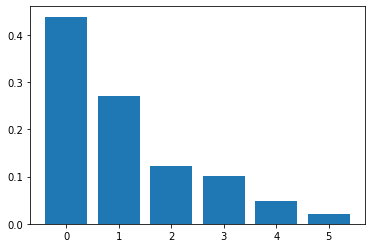

In [166]:
plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)

Here we can see after 2 components not much information can be extracted. Therefore we will use only 2 components. Before that let us see how weights of corresponding feature name help us see correlation between the feature. Further the value of the weight from 0, more closer is the component to the feature. And if 2 features have same number they are directly or inversely proportional

In [167]:
customers_transformed_pca=pd.DataFrame(pca.transform(customers_transformed) , columns =customers_transformed.columns)

In [168]:
customers_transformed_pca

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-1.756030,-0.022463,-0.902073,-1.712854,0.284012,-0.388200
1,-1.782589,-0.837947,0.221064,0.014467,0.128270,-0.211593
2,-1.871300,-1.657090,1.317693,-0.482492,-0.357263,-0.329965
3,1.165280,-1.426609,0.515911,0.437330,-0.683259,0.626242
4,-0.769154,-2.430305,0.457808,-0.302284,-0.288170,0.043097
...,...,...,...,...,...,...
431,0.660962,-2.850567,0.558859,0.675265,1.967215,0.729796
432,3.197819,-1.957292,0.258754,-0.641233,-0.227550,-0.536628
433,-3.736173,-0.890983,-0.966468,-0.913179,0.055446,0.203833
434,1.674393,-0.433088,0.553709,-1.295956,0.116165,-0.002200


In [169]:
def pca_weights(pca, i):
    df = pd.DataFrame(pca.components_[i])
    df.index=customers_transformed_pca.columns
    df.columns=['PCA_Sorting']
    df['PCA_Sorting_Mod'] = df['PCA_Sorting']
    df['PCA_Sorting_Mod'] = df['PCA_Sorting_Mod'].abs()
    df = df.sort_values(by ='PCA_Sorting_Mod',ascending=False)
    return df

In [170]:
pca_weights(pca,0)

,PCA_Sorting,PCA_Sorting_Mod
Detergents_Paper,-0.751217,0.751217
Grocery,-0.437732,0.437732
Milk,-0.401186,0.401186
Frozen,0.180530,0.180530
Fresh,0.170874,0.170874
Delicassen,-0.146026,0.146026


In [171]:
pca_weights(pca,1)

,PCA_Sorting,PCA_Sorting_Mod
Fresh,-0.677455,0.677455
Delicassen,-0.516617,0.516617
Frozen,-0.491717,0.491717
Milk,-0.158427,0.158427
Grocery,-0.072460,0.072460
Detergents_Paper,-0.045011,0.045011


As Discussed above we will use 2 components to create PCA

In [187]:
pca = PCA(n_components = 2 )
#pca.fit_transform(customers_transformed)
customers_transformed_pca=pd.DataFrame(pca.fit_transform(customers_transformed))

### 3. Clustering
Now we will Look at two different Unsupervised Learning algorithms and try to find the best for this dataset
#### 3.1. First we will use KMeans Clustering

In [188]:
def kmeans_analysis(df, no_of_clusters):
    clf = KMeans(n_clusters = no_of_clusters)
    model = clf.fit(df)
    return np.abs(model.score(df))

In [189]:
score = []
for i in range(1,11):
    score.append(kmeans_analysis(customers_transformed_pca, i))
score

[3191.8175982127486,
 1774.517904910571,
 1308.213915809011,
 1023.9759664196108,
 849.9395512937543,
 705.5665883491988,
 594.8930119190346,
 521.0728326504245,
 465.5650883383686,
 424.1612020510645]

Let us plot the graph of distances from centre to see which value should be used for clusters. 

<BarContainer object of 10 artists>

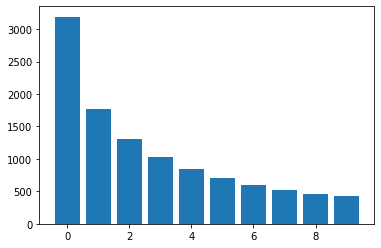

In [190]:
plt.bar(range(len(score)),score)

It is very evident that number of clusters should be 2 as selecting more clusters will not give us any better output

In [191]:
pred = KMeans(n_clusters = 2).fit_predict(customers_transformed_pca)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

We will plot a Scatter plot to see the predicted values of KMeans for 2 clusters.

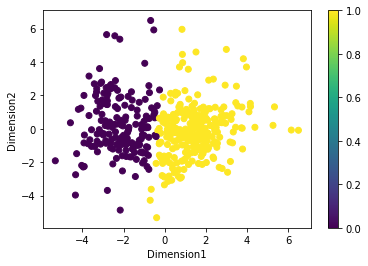

In [192]:
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(customers_transformed_pca[0], customers_transformed_pca[1] , c=pred)
ax.set_xlabel('Dimension1')
ax.set_ylabel('Dimension2')
plt.colorbar(scatter)

From the chart above we can see there is an almost segregation with a vertical line at -0.5

#### 3.2. Now we will use Gaussian Mixture Model to predict clusters

In [178]:
def GMM_analysis(df, no_of_clusters):
    clf = GaussianMixture(n_components = no_of_clusters)
    model = clf.fit(df)
    return np.abs(model.score(df))

In [179]:
score = []
for i in range(1,11):
    score.append(GMM_analysis(customers_transformed_pca, i))
score

[4.1064512616179405,
 4.033217995967305,
 4.030400722332406,
 3.9876157954369957,
 3.9481395193204887,
 3.937672339184331,
 3.9035128293208547,
 3.9269840541320034,
 3.902739243874363,
 3.887490418536639]

(3.85, 4.2)

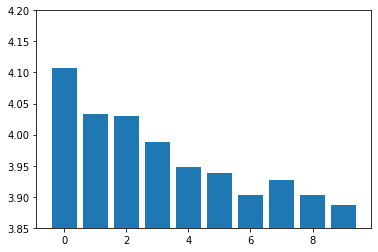

In [180]:
plt.bar(range(len(score)),score)
plt.ylim(3.85,4.2)

Here also it is evident that Number of clusters should be 2

In [181]:
for i in range(2,7):
    pred = GaussianMixture(n_components = i).fit_predict(customers_transformed_pca)
    #print(pred)
    #break
    score = silhouette_score(customers_transformed_pca, pred)
    print(score)

0.4197444848963705
0.4053202416139581
0.36096121901040157
0.28981218140317117
0.32658247722564165


In [182]:
preds = GaussianMixture(n_components = 2).fit_predict(customers_transformed_pca)

Drawing a Scatter plot for Gaussian Mixture model with 2 components

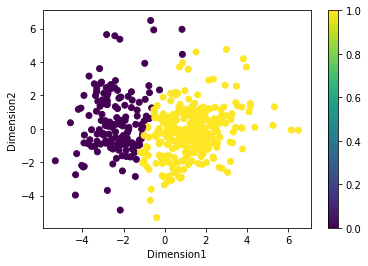

In [183]:
fig = plt.figure()
ax = fig.add_subplot()
scatters = ax.scatter(customers_transformed_pca[0], customers_transformed_pca[1] , c=preds)
ax.set_xlabel('Dimension1')
ax.set_ylabel('Dimension2')
plt.colorbar(scatters)

### 3. Conclusion

From the clustering above we can see that Cluster 0 is a cluster for Retail departmental store while, Cluster 1 is for all the other kinds mentioned as 'Channel'. So the product spending is very clearly segregate what people will buy in retail store and what they will buy in Whole store